In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from june import World
import numpy as np

/home/florpi/JUNE/data
/home/florpi/JUNE/configs


# Model parameters 

All parameters of the model are defined in a YAML config file. An example of a config file can be found in ``configs/config_example.yaml``

In [3]:
CONFIG_PATH = "../configs/config_example.yaml"

# Initialize world

To initialize a certain world, we just need to call the ``World.from_config`` constructor:

In [4]:
world = World.from_config(CONFIG_PATH)

AttributeError: type object 'World' has no attribute 'from_config'

### If it took a long time to run the previous command, it might be a good idea to save the world in a pickle object to reuse it later.

In [5]:
import pickle

In [6]:
with open("world.pkl", "wb") as f:
    pickle.dump(world, f)

If we would like to load the world we saved, we just do

In [7]:
with open("world.pkl", "rb") as f:
    world = pickle.load(f)

# Running the infection

The general command to start the infection is ``world.group_dynamics()``. The number of days to run, as well as the infection model are configured in the config file.

In [8]:
world.group_dynamics()

Starting group_dynamics for  50  days at day 1
Infecting indivuals in their household.
starting the loop ..., at  1  days, to run for  50  days


# Getting the results

All results are stored in a json file specified in the ``save_path`` variable in the config file. We can also access it from ``world.logger`` directly.

In [9]:
data_dict = world.logger.data_dict

In [10]:
data_dict.keys()

dict_keys(['E00062207', 'world', 'E00062208', 'E00062209', 'E00062210', 'E00062211', 'E00062212', 'E00174202', 'E00174206', 'E00174208', 'E00062202', 'E00062203', 'E00062204', 'E00062205', 'E00062206', 'E00062379', 'E00062380', 'E00062381', 'E00062382', 'E00062383'])

As we can see, the keys of the data dictionary are all the output areas in the world, as well as the ``world`` key.

In [11]:
data_dict["world"].keys()

dict_keys([1, 1.3333333333333333, 2.0, 3.0, 4.0, 4.333333333333333, 5.0, 5.333333333333333, 6.0, 6.333333333333333, 7.0, 7.333333333333333, 8.0, 8.333333333333334, 9.0, 10.0, 11.0, 11.333333333333334, 12.0, 12.333333333333334, 13.0, 13.333333333333334, 14.0, 14.333333333333334, 15.0, 15.333333333333334, 16.0, 17.0, 18.0, 18.333333333333332, 19.0, 19.333333333333332, 20.0, 20.333333333333332, 21.0, 21.333333333333332, 22.0, 22.333333333333332, 23.0, 24.0, 25.0, 25.333333333333332, 26.0, 26.333333333333332, 27.0, 27.333333333333332, 28.0, 28.333333333333332, 29.0, 29.333333333333332, 30.0, 31.0, 32.0, 32.333333333333336, 33.0, 33.333333333333336, 34.0, 34.333333333333336, 35.0, 35.333333333333336, 36.0, 36.333333333333336, 37.0, 38.0, 39.0, 39.333333333333336, 40.0, 40.333333333333336, 41.0, 41.333333333333336, 42.0, 42.333333333333336, 43.0, 43.333333333333336, 44.0, 45.0, 46.0, 46.333333333333336, 47.0, 47.333333333333336, 48.0, 48.333333333333336, 49.0, 49.333333333333336, 50.0])

The second layer of keys containts the days for which the simulation has been run. Note that 1.33 means one day and 8 hours, corresponding to end of the first shift in day one.

In [12]:
data_dict["world"][10]

{'susceptible': 16, 'infected': 122, 'recovered': 0, 'r0': 0.7758620689655172}

For each day we store the number of suscpetible, infected and recovered people. We also store the r0 number, which is averaged correctly depending on the location we are looking at.

The logger also has some plotting functions

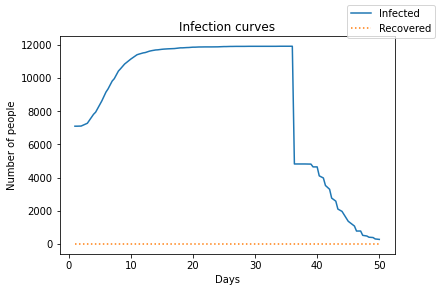

In [13]:
fig, ax = world.logger.plot_infection_curves_per_day()

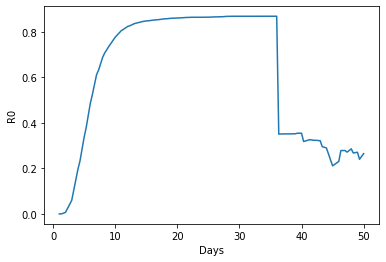

In [14]:
fig, ax = world.logger.plot_r0()